<a href="https://colab.research.google.com/github/Isratjahanmokta/CodeAlpha-Credit_Scoring_model/blob/main/Credit_Scoring_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
#Importing dataset
dataset = pd.read_csv("bank.csv", delimiter = ";")

In [ ]:
#shows first few rows of the code
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
dataset.shape

(4521, 17)

In [ ]:
# explore missing values
dataset.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
dataset['marital'].value_counts()

,count
marital,
married,2797
single,1196
divorced,528


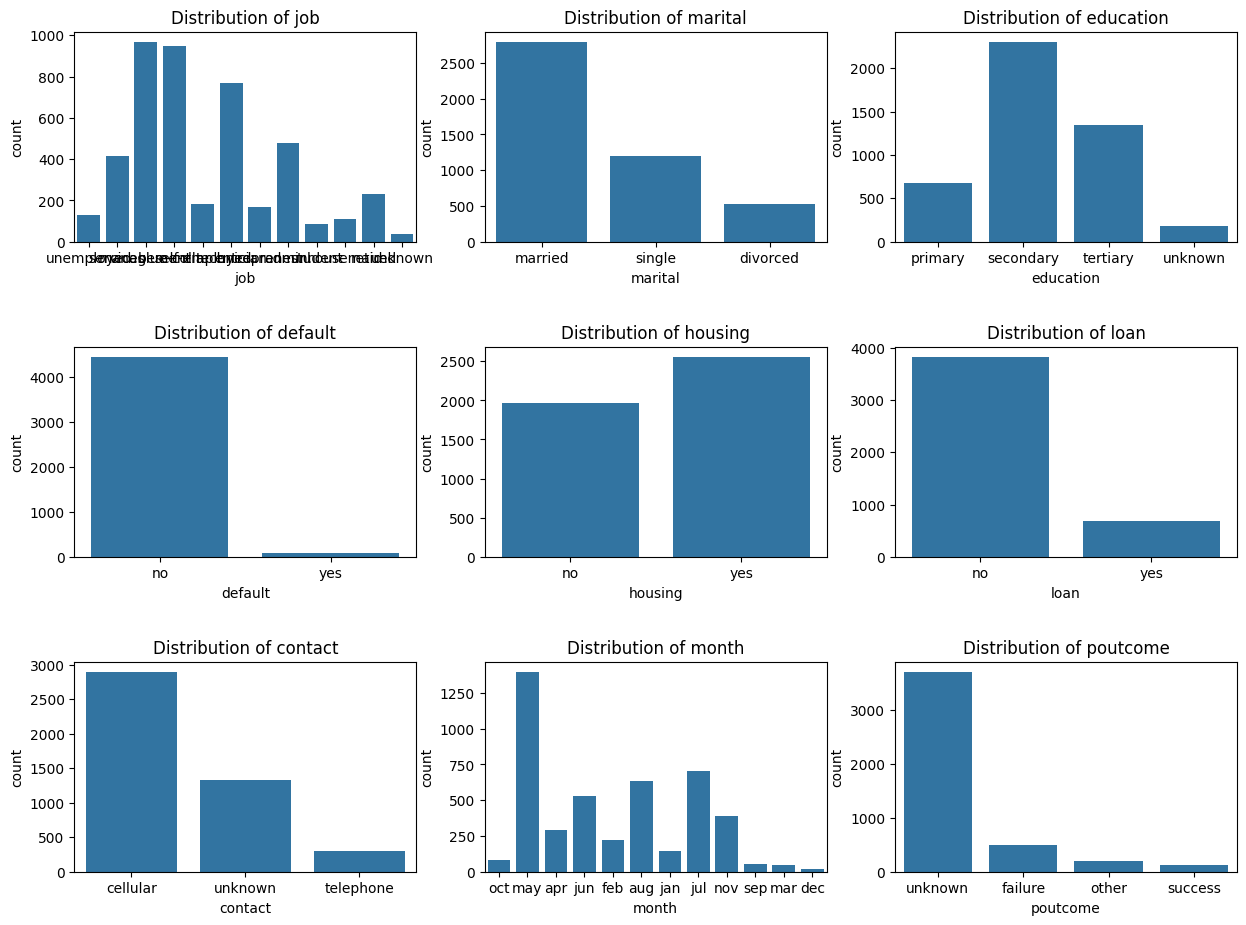

In [ ]:
#Countplot for categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features)//3 + 1, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through categorical features and create countplots
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=dataset, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove empty subplots
for i in range(len(categorical_features), len(axes.flat)):
    fig.delaxes(axes.flatten()[i])

# Show the plot
plt.show()

# Plot histograms for each categorical feature
for i, feature in enumerate(categorical_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, data=dataset, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')


plt.show()

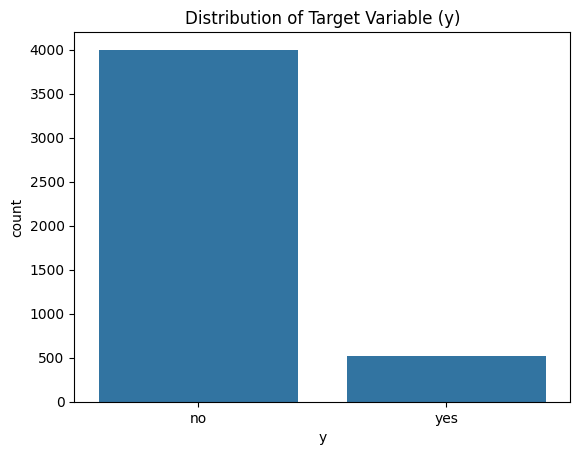

In [ ]:
# Distribution of the target variable 'y'
sns.countplot(x='y', data=dataset)
plt.title('Distribution of Target Variable (y)')
plt.show()

In [ ]:
lst=["job","marital","education","default","housing","housing","loan","contact","month","poutcome","y"]
le=LabelEncoder()
for i in lst:
    dataset[i]=le.fit_transform(dataset[i])

In [ ]:
dataset.rename(columns={"y": "loan_approval"}, inplace=True)

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
#Using RandomOverSampler to address class imbalance by oversampling the minority class in the dataset
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
X,y=sm.fit_resample(X,y)

In [ ]:
#minmaxscaler
ms=MinMaxScaler()
X=ms.fit_transform(X)
X

array([[0.16176471, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.20588235, 0.63636364, 0.5       , ..., 0.38990826, 0.16      ,
        0.        ],
       [0.23529412, 0.36363636, 1.        , ..., 0.37958716, 0.04      ,
        0.        ],
       ...,
       [0.13235294, 0.36363636, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.42647059, 0.27272727, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.19117647, 0.09090909, 0.5       , ..., 0.1146789 , 0.2       ,
        0.66666667]])

In [ ]:
# Splitting dataset into training and test (in ratio 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#Logistic_Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, y_pred)
print(log_reg_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.78453125
0.789375
[[630 171]
 [166 633]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       801
           1       0.79      0.79      0.79       799

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



In [ ]:
#K-Nearest Neighbours

k_NN = KNeighborsClassifier()
k_NN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = k_NN.predict(X_test)

In [ ]:
print(accuracy_score(y_train, k_NN.predict(X_train)))
KNN_acc = accuracy_score(y_test, y_pred)
print(KNN_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.931875
0.880625
[[636 165]
 [ 26 773]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       801
           1       0.82      0.97      0.89       799

    accuracy                           0.88      1600
   macro avg       0.89      0.88      0.88      1600
weighted avg       0.89      0.88      0.88      1600



In [ ]:
#Support vector machines
SVC = SVC(kernel = 'linear', probability=True)
SVC.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_pred = SVC.predict(X_test)

In [ ]:
print(accuracy_score(y_train, SVC.predict(X_train)))
SVC_acc = accuracy_score(y_test, y_pred)
print(SVC_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.77875
0.788125
[[636 165]
 [174 625]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       801
           1       0.79      0.78      0.79       799

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



In [ ]:
#Decision trees

DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = DT.predict(X_test)

In [ ]:
print(accuracy_score(y_train, DT.predict(X_train)))
DT_acc = accuracy_score(y_test, y_pred)
print(DT_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.959375
[[739  62]
 [  3 796]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       801
           1       0.93      1.00      0.96       799

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [ ]:
#Random Forest

RF = RandomForestClassifier(n_estimators = 130, criterion = 'entropy', random_state = 0)
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=130, random_state=0)

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
print(accuracy_score(y_train, RF.predict(X_train)))
RF_acc = accuracy_score(y_test, y_pred)
print(RF_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.971875
[[756  45]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       801
           1       0.95      1.00      0.97       799

    accuracy                           0.97      1600
   macro avg       0.97      0.97      0.97      1600
weighted avg       0.97      0.97      0.97      1600



In [ ]:
#GradientBoostingClassifier
GBC = GradientBoostingClassifier()

parameters = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(GBC, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [ ]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 180}

In [ ]:
grid_search_gbc.best_score_

0.8890625

In [ ]:
GBC = GradientBoostingClassifier(learning_rate = 0.1, loss = 'log_loss', n_estimators = 180)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=180)

In [ ]:
y_pred = GBC.predict(X_test)

In [ ]:
print(accuracy_score(y_train, GBC.predict(X_train)))
GBC_acc = accuracy_score(y_test, y_pred)
print(GBC_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.919375
0.905
[[680 121]
 [ 31 768]]
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       801
           1       0.86      0.96      0.91       799

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.90      1600
weighted avg       0.91      0.91      0.90      1600



In [ ]:
#Accuracy_list

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'GB Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(KNN_acc,4), 100*round(SVC_acc,4), 100*round(DT_acc,4), 100*round(RF_acc,4), 100*round(GBC_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest Classifier,97.19
3,Decision Tree Classifier,95.94
5,GB Classifier,90.50
1,KNN,88.06
0,Logistic Regression,78.94
2,SVM,78.81


In [ ]:
import pickle
model = SVC
pickle.dump(model, open("credit_score_model.pkl","wb"))

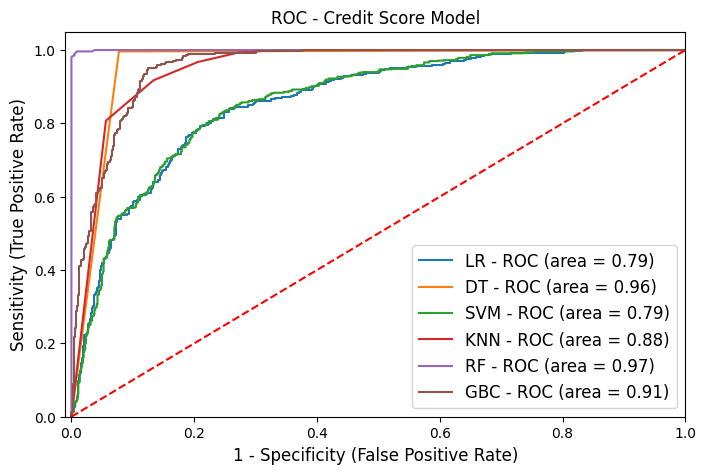

In [ ]:
#Model Comparison¶

from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': DT,
},
{
    'label': 'SVM',
    'model': SVC,
},
{
    'label': 'KNN',
    'model': k_NN,
},
{
    'label': 'RF',
    'model': RF,
},
{
    'label': 'GBC',
    'model': GBC,
},
]
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Credit Score Model', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_credit_score.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[78.94, 88.06, 78.81, 95.94, 97.19, 90.5]
[78.94, 95.94, 78.81, 88.07000000000001, 97.19, 90.51]


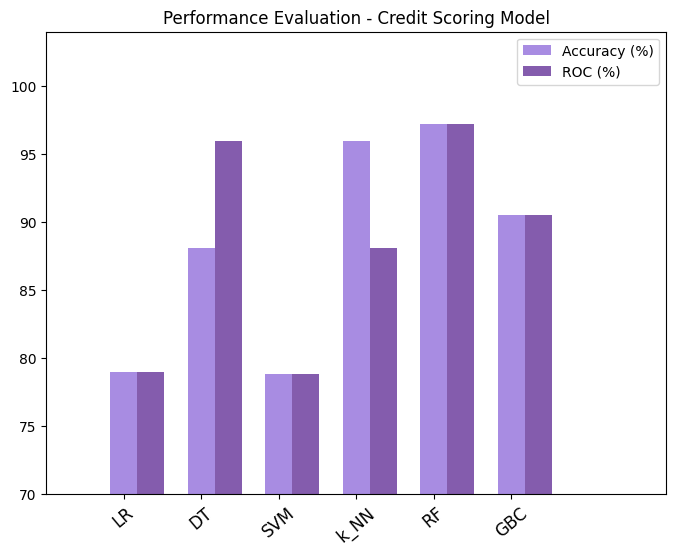

In [ ]:
means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(KNN_acc,4), 100*round(SVC_acc,4), 100*round(DT_acc,4), 100*round(RF_acc,4), 100*round(GBC_acc,4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)
# data to plot
n_groups = 6
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 7])
plt.ylim([70, 104])

plt.title('Performance Evaluation - Credit Scoring Model', fontsize=12)
plt.xticks(index, ('LR', 'DT', 'SVM', 'k_NN', 'RF','GBC'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("credit_scoring_model.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
#RNN approch
#LSTM

# Reshape data for LSTM (assuming you have a time series dataset)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model with a specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
_, accuracy = model.evaluate(X_test_lstm, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6847 - loss: 0.5895 - val_accuracy: 0.7513 - val_loss: 0.5098
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7785 - loss: 0.4794 - val_accuracy: 0.7794 - val_loss: 0.4713
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7830 - loss: 0.4628 - val_accuracy: 0.7606 - val_loss: 0.4883
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7851 - loss: 0.4594 - val_accuracy: 0.7919 - val_loss: 0.4658
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8023 - loss: 0.4292 - val_accuracy: 0.7962 - val_loss: 0.4303
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8013 - loss: 0.4300 - val_accuracy: 0.8006 - val_loss: 0.4221
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8089 - loss: 0.4104 - val_accuracy: 0.8012 - val_loss: 0.4178
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8171 - loss: 0.4032 - val_accuracy: